In [1]:
import random
import numpy as np
from numpy.linalg import norm as vector_norm
import matplotlib.pyplot as plt
import sys
import seaborn as sns


sys.path.append('../modules')
from nsw import Node, NSWGraph
import data_gen as dg

In [2]:
def plot(X, y):
    data = {}
    data['x'] = X[:,0]
    data['y'] = X[:,1]
    data['class'] = y
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="x", y="y",
        style="class", hue="class",
        data=data,
        legend="full",
        alpha=0.7
    )

In [7]:
G = NSWGraph()

values = dg.gen2(4000) 
G.build_navigable_graph(values, K=30, multi_n=15)

In [8]:
test = dg.gen2(200)
X_test = [t[0] for t in test]
y_test = [t[1] for t in test]

In [9]:
from sklearn.metrics import accuracy_score

ks = [1, 3, 5, 9, 15, 31]
accs = []
y_predicted = []
for k in ks:
    y_predicted = []
    for x in X_test:
        nodes = G.multi_search(x, attempts=15, top_k=k)
        # print(sum([values[n][1] for n in nodes]))
        cls = 1 if sum(values[n][1] for n in nodes) > k // 2 else 0
        y_predicted.append(cls)
    print(f"Done for k={k}")
    accs.append(accuracy_score(y_test, y_predicted))

Done for k=1
Done for k=3
Done for k=5
Done for k=9
Done for k=15
Done for k=31


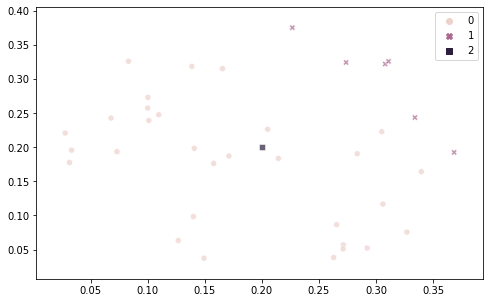

In [11]:
G.multi_search_and_plot((0.2, 0.2), attempts=15, top_k=36)

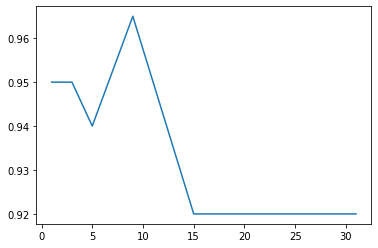

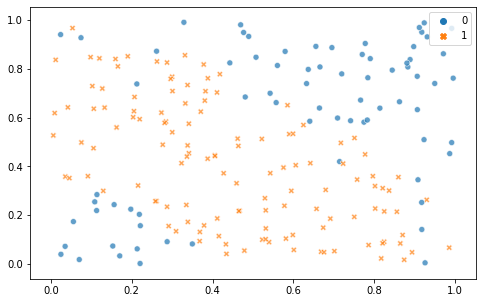

In [10]:
# G.plot()

plt.plot(ks, accs)
plt.show()

plot(np.array(X_test), y_predicted)
plt.show()